<a href="https://colab.research.google.com/github/poudel4samikshya/Machine_Learning_Assignment/blob/main/DataScience_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 2
Say you started a YouTube channel about a year ago. You’ve done quite well so far and have collected some data. You want to know the probability of at least x visitors to your channel given some time period. The obvious choice in distributions is the Poisson distribution which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

#Question 1: (50 points) 

Simulate 100 visits to your youtube channel, assuming that they will a Poisson distribution with a mean of 10 visits per minute. Plot the arrival time vs visitor index.


#ANS:

Given for possion distribution:

1) λ = 10, which is mean value per minute

2) n = 100, which represents the number of visits

since we are starting from the begining, we initialize the arrival time for the visitor with '0'.




#Why do we use inverse CDF to find the inter arrival time?

The number of occurrence of events is a discrete Poisson distribution, but  the interval of time between consecutive events  is continous distribution and it can be modeled by using the Exponential distribution.


  Let X1, X2, X3,…etc. be random variables such that:

X1 = the interval of time between the start of the process and the 1st event, i.e. 1st arrival,

X2 = the inter-arrival time between the first and the second arrival,

X3 = the inter-arrival time between the second and the third arrival,
and so forth.

The distribution of random variable Xk which represents the inter-arrival time between the (k-1)th and (k)th arrival is:
  
  
  image.png

  The Probability Density Function (PDF) of the random variable Xk is as follows:

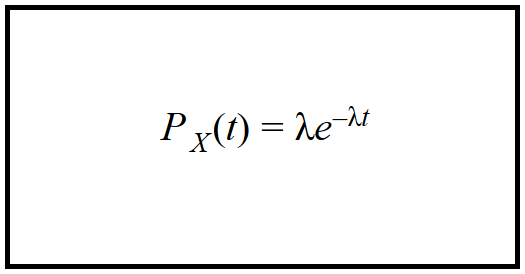

And the Cumulative Distribution Function (CDF) is:

  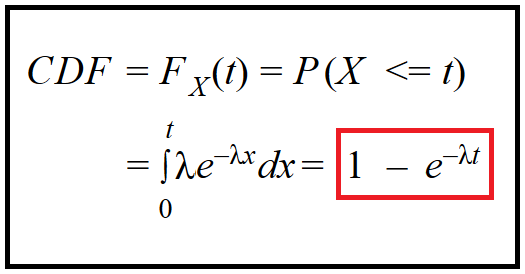

In order to simulate the interarrival time between visitors, we construct the inverse function of the CDF, and feed it different probability values from a Uniform(0,1) distribution. This gives us the corresponding inter-arrival times for the respective probabilities:


 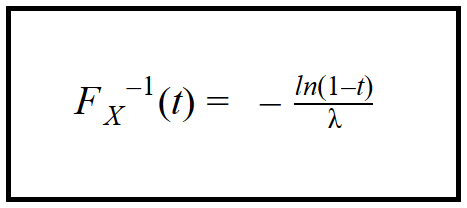




#For this problem: 

we use the formula to caculate the CDF:

--->    inter_arrival_time = -math.log(1.0 - p)/lambda_parameter

"p"  is a probability value from Uniform(0,1) and  rate parameter λ= 10. 

Solving for the inverse CDF, we get that

F−1X(t)=−ln(1−p)/10

Using our algorithm above, we first generate U∼Unif(0,1), then finnd the inverse of CDF to calculate the inter arrival times.  We do this using python code below and compare the given number of visits  with their arrival time.

EVENT_NUM,      INTER_EVENT_T,          ARRIVAL_TIME
0            0.04168251468448426         0.04168251468448426
1            0.1571927351913802         0.19887524987586444
2            0.051452238239138484         0.25032748811500294
3            0.15230744101181598         0.4026349291268189
4            0.034663973678556934         0.43729890280537587
5            0.05759861859585519         0.49489752140123106
6            0.001786787894353595         0.49668430929558466
7            0.05856305310359829         0.5552473623991829
8            0.03371983074696113         0.5889671931461441
9            0.05302651427579665         0.6419937074219407
10            0.08101631693838898         0.7230100243603297
11            0.06719182970044238         0.790201854060772
12            0.1280070712285423         0.9182089252893143
13            0.06266473049629392         0.9808736557856083
14            0.3707951597477014         1.3516688155333096
15            0.062102888676968046   

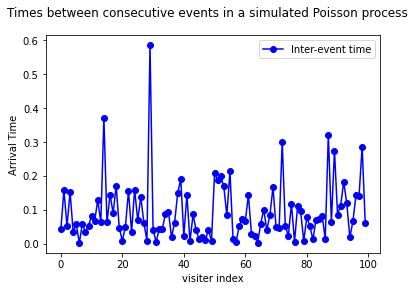

<Figure size 432x288 with 0 Axes>

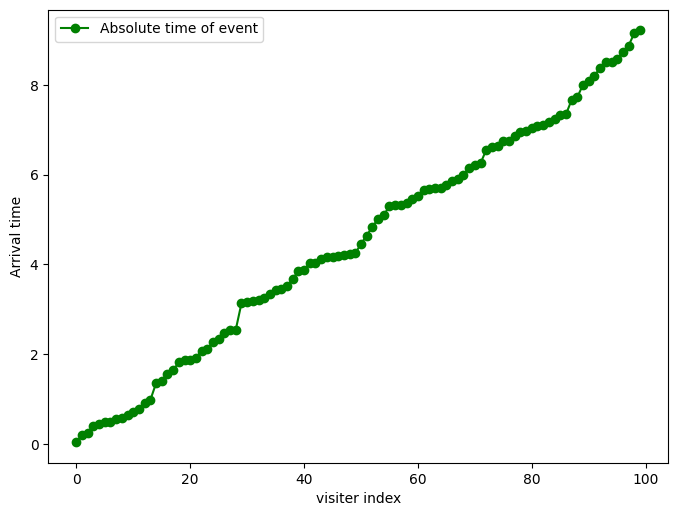

In [ ]:
#importing required libraries 

import random
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#given value
lambda_parameter = 10
num_visit  = 100


arrival_time = 0
event_num = [] # stores the number of visit
inter_event_times = [] # stores the how much time after the visitor came with respect to the previous visitor
event_times = [] # stores the cummulative arrival time of every visitor with respect to initial arrival time which is  '0'



print('EVENT_NUM,      INTER_EVENT_T,          ARRIVAL_TIME')

#iterating 100 times since there are 100 visitors
for i in range (num_visit):
  event_num.append(i)

  #Get the next probability value from Uniform(0,1)
  p = random.random()

 #Plug it into the inverse of the CDF of Exponential(_lamnbda)
  inter_arrival_time = -math.log(1.0 - p)/lambda_parameter
  inter_event_times.append(inter_arrival_time)

  #Add the inter-arrival time to the running sum
  arrival_time = arrival_time + inter_arrival_time
  event_times.append(arrival_time)
  #print it all out
  print(str(i) +'            ' + str(inter_arrival_time) + '         ' + str(arrival_time))
  
#plot the inter-event time
fig = plt.figure()
fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('visiter index')
plt.ylabel('Arrival Time')
plt.show()


#plot the absolute event times
fig = plt.figure()
figure(figsize=(8, 6), dpi=100)
fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, event_times, 'bo-', label='Absolute time of event', color = 'green')
plt.legend(handles=[plot])
plt.xlabel('visiter index')
plt.ylabel('Arrival time')
plt.show()




In [ ]:
print(event_times)

[0.04168251468448426, 0.19887524987586444, 0.25032748811500294, 0.4026349291268189, 0.43729890280537587, 0.49489752140123106, 0.49668430929558466, 0.5552473623991829, 0.5889671931461441, 0.6419937074219407, 0.7230100243603297, 0.790201854060772, 0.9182089252893143, 0.9808736557856083, 1.3516688155333096, 1.4137717042102778, 1.5575495321336337, 1.6475928228523034, 1.8180494369614124, 1.8632958797832788, 1.8717947989680863, 1.9217707184763917, 2.076838162253241, 2.110929194654208, 2.2696355872410985, 2.3385578696608107, 2.476103795861875, 2.5371846801076385, 2.5459903343260133, 3.1313458348655487, 3.1702638280136517, 3.176178474610448, 3.2187139813822787, 3.2625488761704036, 3.3486361192243654, 3.442105643198577, 3.4608547671768704, 3.5228937461513534, 3.6716264590395555, 3.861588890079981, 3.885103215469757, 4.028664469825865, 4.035078627936205, 4.120895086184942, 4.159586061762674, 4.1719630672250885, 4.191878112835047, 4.201668539481947, 4.241674178461152, 4.24952137384251, 4.45776174

Exercise 2:
#gradient descent

(50 points) Assume that you are given the visitation data generated in Step 1, implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean.

# ANS: 

My visitation data from step 1 is "event_times" which stores the cummulative arrival time of every visitors with respect to initial arrival time which is  '0'.

so we are iterating through the "event_times" to count the number of events per unit time

In [ ]:
interval_nums = [] # it stores the number of interval we will have for 100 visits
num_events_in_interval = [] # stores the number of events per interval
interval_num = 1
num_events = 0 # counting number of events per interval

print('INTERVAL_NUM,  NUM_EVENTS')

for i in range(len(event_times)):
	event_time = event_times[i]
	if event_time <= interval_num:
		num_events += 1
		
		
		if (i == (len(event_times)-1)):
			interval_nums.append(interval_num)
			num_events_in_interval.append(num_events)
			print(str(interval_num) +'                ' + str(num_events))
		
	else:
		interval_nums.append(interval_num)
		num_events_in_interval.append(num_events)

		print(str(interval_num) + '                 ' + str(num_events))

		interval_num += 1

		num_events = 1


INTERVAL_NUM,  NUM_EVENTS
1                 14
2                 8
3                 7
4                 12
5                 12
6                 16
7                 11
8                 9
9                 9
10                2


#Implementing gradient descent

Parameters we need to calculate the estimated mean using gradient descent:

1) num_visit  - for this problem - represents the number of vistors given which is 100

2)mean (lambda) - for the first iteration we will provide random value of lambda which I have given 12


3) eta (learning parameter) - which I have given 0.01

# formula to calcualte the estimated mean using gradient is:

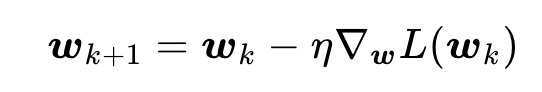


where \etaη is the scalar learning rate that is a hyperparameter. η∇ 
w
​
 L(w 
k
​
 ) is the gradient.



# gradient_calc() function to calculate the gradient for each iteration:

  The formula to calculate the gradient is : using negative log liklihood

  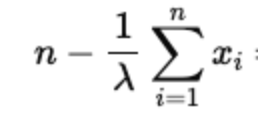

where n is the number of iteration, λ is estimated mean annd 'x" is the number of events per unit time.



In [ ]:
#implementing gradient_calc fuction to calculate the gradient for each iteration
def gradient_calc(lambda_p,n,num_visit):
    gradient =  n - ((1/lambda_p ) * num_visit)
    return gradient
  
 


In [ ]:

# implementing gradient descent 

lambda_p = 12 # I chose random lambda to start with
num_visit = 100 # represents the number of visitors
n = len(num_events_in_interval) 
eta = 0.01
estimated_mean = [] # stores the estimitad mean per interval
iterations  = [] #stores  iterations

def gradient_descent(num_visit,eta,lambda_p,n):
 
  for i in range(1000): # 1000 represents the number of iterartions
    iterations.append(i)
    lambda_p = lambda_p - (eta * gradient_calc(lambda_p,n,num_visit))
    estimated_mean.append(lambda_p)

  return lambda_p #returns the estimated mean after the given number of iterations

 
print(gradient_descent(num_visit,eta,lambda_p,n)) 


10.000105661537365


<Figure size 432x288 with 0 Axes>

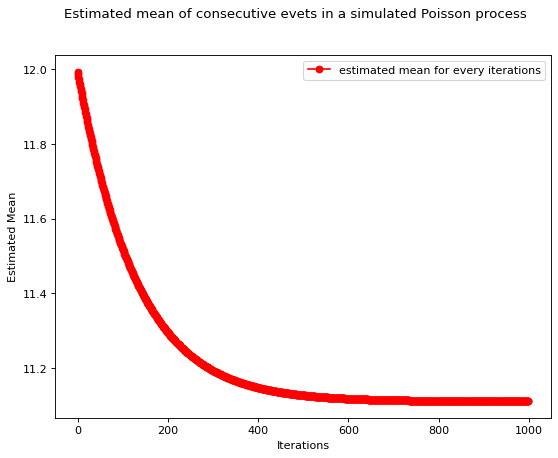

In [ ]:
# ploting
import numpy as np

fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
plt.suptitle('Estimated mean of consecutive evets in a simulated Poisson process')
plot, = plt.plot(iterations, estimated_mean,'bo-', label='estimated mean for every iterations', color = 'red')
plt.legend(handles=[plot])
plt.xlabel('Iterations')
plt.ylabel('Estimated Mean')
plt.show()

# From the figure, we can see that with the increase in iteration, the mean or Lambda is converging towards the true mean '10'.
